# Linear Regression

🎯 In this exercise, you will model the sale price of houses (`SalePrice`) according to their living areas (`GrLivArea`) 

👇 Load the `houses.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

<details>
    <summary>💡 Hint</summary>
    The dataset is located in a parent directory, you should use <code>../</code> in order to find it.
</details>

In [1]:
import pandas as pd
import numpy as np

path = "../data/houses.csv"
houses = pd.read_csv(path)

houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


ℹ️ You can download a detailed description of the dataset [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to refer to it throughout the day.

## 1. Define the feature set and target

🎯 The objective is to model the sale price of houses in \$ (`SalePrice`) according to their living areas in $ft^2$ (`GrLivArea`).

👇 Assign those two variables to X and y. Remember that X is the feature(s), and y the target.

In [2]:
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Pesos', 'WallMat', 'RoofSurface',
       'ChimneyStyle', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'G

In [3]:
X = houses['GrLivArea']
y = houses['SalePrice']

👇 In a scatter plot ([doc](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html)) , visualize the relationship between the living areas and the sale prices.

In [4]:
import matplotlib.pyplot as plt

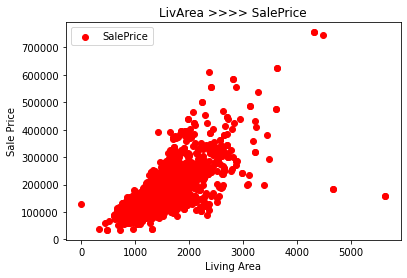

In [67]:
plt.scatter(X,y, c='red')

plt.xlabel("Living Area")
plt.ylabel("Sale Price")
plt.legend(["SalePrice"])
plt.title("LivArea >>>> SalePrice")

plt.show()

ℹ️ The scatter plot should hint at the somewhat linear relationship.

### ☑️ Test your code

In [9]:
from nbresult import ChallengeResult

result = ChallengeResult('variables',
                         variable_X = round(X.mean()),
                         variable_y = round(y.mean())
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/cherif/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/cherif/code/cherifbenham/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: anyio-3.4.0
collecting ... collected 2 items

tests/test_variables.py::TestVariables::test_variable_X PASSED           [ 50%]
tests/test_variables.py::TestVariables::test_variable_y PASSED           [100%]

============================== 2 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/variables.pickle

git commit -m 'Completed variables step'

git push origin master


## 2. Cross-validation

👇 Using Sklearn's `cross_validate` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)), run a 5-fold cross validation on a `LinearRegression` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) model predicting sale price from living area. Save the raw output of the cross validation under a new variable `cv_results`.

In [68]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, X, y, cv=5)

cv_results['test_score']
cv_results['test_score'].mean()

0.4863112208425962

❓ What is the lowest score of the cross validation? Compute your answer and save the value under new variable `min_score`.

In [69]:
min_score = cv_results['test_score'].min()
min_score

0.3911751008901019

❓ What is the highest score of the cross validation?  Compute your answer and save the value under new variable `max_score`.

In [70]:
max_score = cv_results['test_score'].max()
max_score

0.5581065677255257

❓ What is the mean score of the cross validation? Compute your answer and save the value under new variable `mean_score`.

In [18]:
mean_score = cv_results['test_score'].mean()
mean_score

0.4863112208425962

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [19]:
from nbresult import ChallengeResult

result = ChallengeResult('cv_results',
                         cv_result = cv_results,
                         min_score = min_score,
                         max_score = max_score,
                         mean_score = mean_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/cherif/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/cherif/code/cherifbenham/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: anyio-3.4.0
collecting ... collected 4 items

tests/test_cv_results.py::TestCvResults::test_cv_max PASSED              [ 25%]
tests/test_cv_results.py::TestCvResults::test_cv_mean PASSED             [ 50%]
tests/test_cv_results.py::TestCvResults::test_cv_min PASSED              [ 75%]
tests/test_cv_results.py::TestCvResults::test_cv_results PASSED          [100%]

============================== 4 passed in 0.20s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master


👇 Plot the evolution of **total computational time** and **mean score** as K folds increases from 2 until 40.

In [40]:
k_array = np.arange(2,100,1)
mean_score = [] 
score_time = []
fit_time = []

for k in k_array:
    cv_results = cross_validate(model, X, y, cv=k)
    mean_score.append(cv_results['test_score'].mean())
    score_time.append(cv_results['score_time'].mean())
    fit_time.append(cv_results['fit_time'].mean())

Text(0.5, 1.0, 'test score')

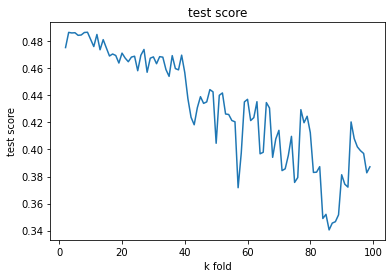

In [43]:
plt.plot(k_array, mean_score)
plt.xlabel('k fold')
plt.ylabel('test score')
plt.title('test score')

Text(0.5, 1.0, 'score_time')

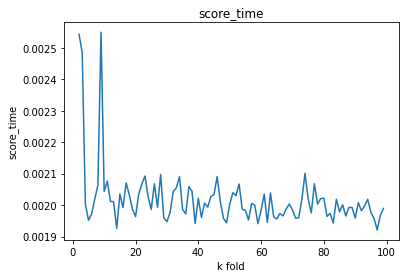

In [44]:
plt.plot(k_array, score_time)
plt.xlabel('k fold')
plt.ylabel('score_time')
plt.title('score_time')

Text(0.5, 1.0, 'fit_time')

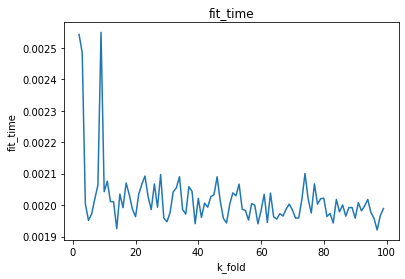

In [45]:
plt.plot(k_array, score_time)
plt.xlabel('k_fold')
plt.ylabel('fit_time')
plt.title('fit_time')

ℹ️ You will notice that while the score stabilizes, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the model

Cross validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross validation. 

👇 Go ahead and train the model. Save the trained model under the variable `model`.

In [47]:
#train a lin reg model
from sklearn.linear_model import LinearRegression
X = houses[['GrLivArea']]
y = houses['SalePrice']
model = LinearRegression()
model.fit(X, y)
model

LinearRegression()

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under variable name `slope`.

In [48]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['GrLivArea'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([105.00927564]),
 '_residues': 6057823954066.709,
 'rank_': 1,
 'singular_': array([22956.18618344]),
 'intercept_': 22104.12101002084}

In [53]:
slope = model.__dict__['coef_'][0]
slope

105.00927563558825

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under variable name `intercept`.

In [54]:
intercept = model.__dict__['intercept_']
intercept

22104.12101002084

### ☑️ Test your code

In [55]:
from nbresult import ChallengeResult

result = ChallengeResult('trained_model',
                         model = model,
                         slope = slope,
                         intercept = intercept
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/cherif/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/cherif/code/cherifbenham/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: anyio-3.4.0
collecting ... collected 2 items

tests/test_trained_model.py::TestTrainedModel::test_intercept PASSED     [ 50%]
tests/test_trained_model.py::TestTrainedModel::test_slope PASSED         [100%]

============================== 2 passed in 0.67s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master


## 4. Visualize the model

👇 With matplotlib: 
- Define the line of best fit equation (using the slope and intercept values)
- Plot it in a graph over the scattered data points

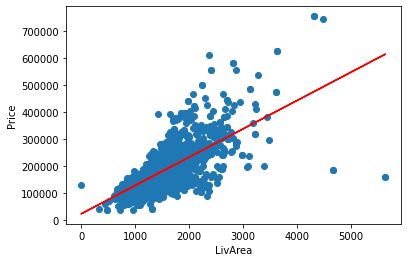

In [60]:
plt.scatter(X,y)
plt.plot()
plt.xlabel('LivArea')
plt.ylabel('Price')
plt.plot(X, intercept + slope * X, color = "red")

# 5. Predict

👇 Use your trained model to predict the sale price of a house with a living area of 1500 square feet. Save the predicted price as variable name `prediction`.

In [64]:
prediction = model.predict([[1500]])

/home/cherif/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### ☑️ Test your code

In [65]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/cherif/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/cherif/code/cherifbenham/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_prediction.py::TestPrediction::test_prediction PASSED         [100%]

============================== 1 passed in 0.18s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master


# 🏁